# **Data Exploration**

In [1]:
# Project Setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from xgboost import XGBClassifier

import kagglehub

from scipy.stats import ttest_ind, chi2_contingency

from statsmodels.formula.api import ols
import statsmodels.api as sm


In [2]:
# Download latest version
path = kagglehub.dataset_download("itsmesunil/bank-loan-modelling")

print("Path to dataset files:", path)
path

Path to dataset files: /kaggle/input/bank-loan-modelling


'/kaggle/input/bank-loan-modelling'

In [3]:
# Create DataFrame
df = pd.read_excel('/kaggle/input/bank-loan-modelling/Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')
Description = pd.read_excel('/kaggle/input/bank-loan-modelling/Bank_Personal_Loan_Modelling.xlsx', sheet_name='Description',skiprows=6)

In [4]:
print("Number of columns in data :",len(df.columns))
df.columns

Number of columns in data : 14


Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
Description = Description.drop('Unnamed: 0', axis=1)
Description.columns = ['Column', "Description"]
Description

,Column,Description
0,ID,Customer ID
1,Age,Customer's age in completed years
2,Experience,#years of professional experience
3,Income,Annual income of the customer ($000)
4,ZIPCode,Home Address ZIP code.
5,Family,Family size of the customer
6,CCAvg,Avg. spending on credit cards per month ($000)
7,Education,Education Level. 1: Undergrad; 2: Graduate; 3:...
8,Mortgage,Value of house mortgage if any. ($000)
9,Personal Loan,Did this customer accept the personal loan off...


In [8]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
missing_value = df.isnull().sum()
print(missing_value)
print("\n No missing value")

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

 No missing value


In [10]:
print('Number Duplicated data :',df.duplicated().sum())
print("No Duplicated Data")

Number Duplicated data : 0
No Duplicated Data


***Distribution Analysis***

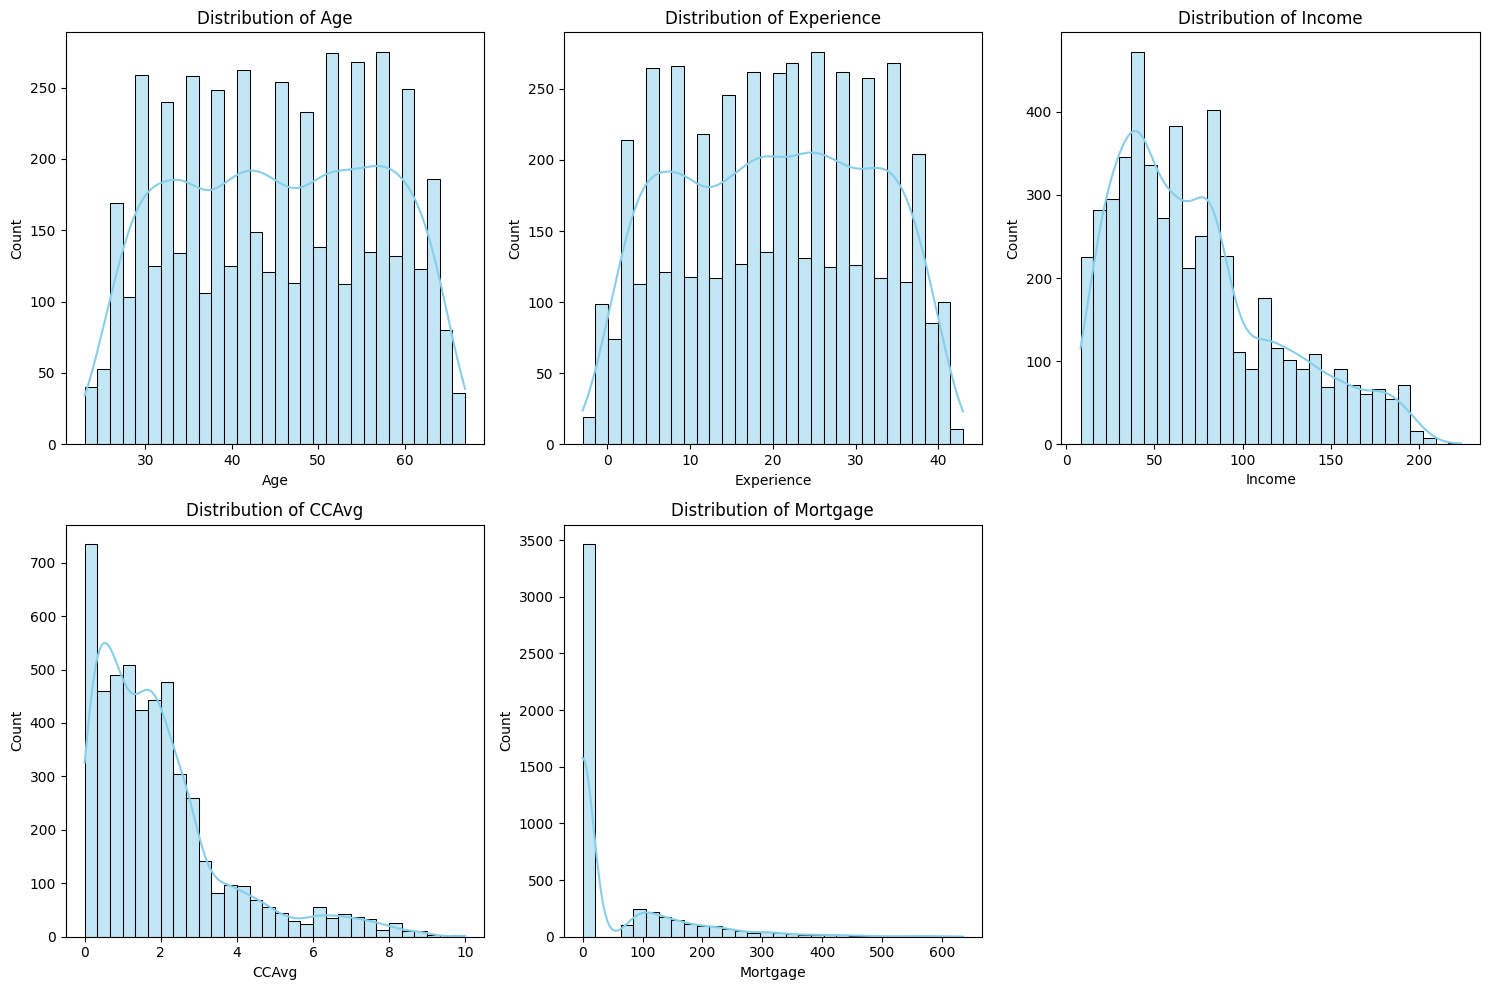

In [11]:
num_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


** 📊 Summary of Variable Distributions**

The distribution analysis of key numerical features reveals the following:

* **Age** and **Experience** are approximately uniformly distributed across the customer base, indicating a well-spread range of age and work experience.

* **Income**, **CCAvg**, and **Mortgage** are **right-skewed**, showing that most customers have low-to-moderate income, credit card usage, and mortgage values, with a small portion of customers having significantly higher values.

* Notably, the **Mortgage** variable shows a strong right skew with a large number of zero values, indicating that many customers do not have a home mortgage.

---

/tmp/ipython-input-12-1953529288.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Personal Loan', data=df, palette='Set2')


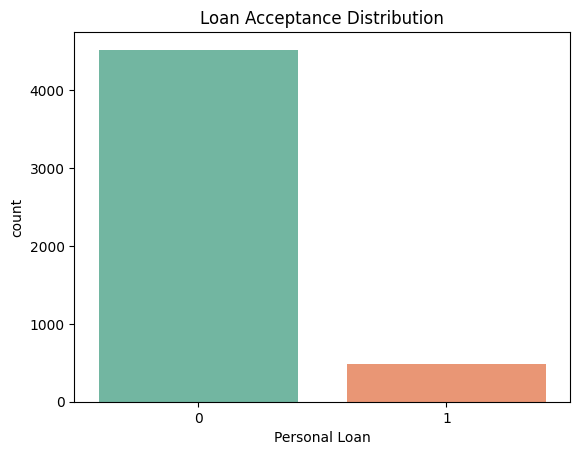

Personal Loan
0    0.904
1    0.096
Name: proportion, dtype: float64


In [12]:
sns.countplot(x='Personal Loan', data=df, palette='Set2')
plt.title('Loan Acceptance Distribution')
plt.show()

print(df['Personal Loan'].value_counts(normalize=True))


⚠️ Imbalanced Dataset
The dataset is highly imbalanced, with a significant disparity between the two classes of the target variable (Personal Loan):
--
Customers who did not take a personal loan (Personal Loan = 0): approximately 4,500

Customers who did take a personal loan (Personal Loan = 1): approximately 500

This results in an approximate class ratio of 9:1, meaning that the majority class (0) dominates the dataset.

Implications:
--
Machine learning models trained on this data may be biased toward predicting the majority class.

Metrics like accuracy may be misleading.

Therefore, special techniques such as resampling (oversampling/undersampling), SMOTE, or using metrics like precision, recall, F1-score, and ROC-AUC are necessary for proper evaluation.



**Correlation Heatmap for Numerical Features**

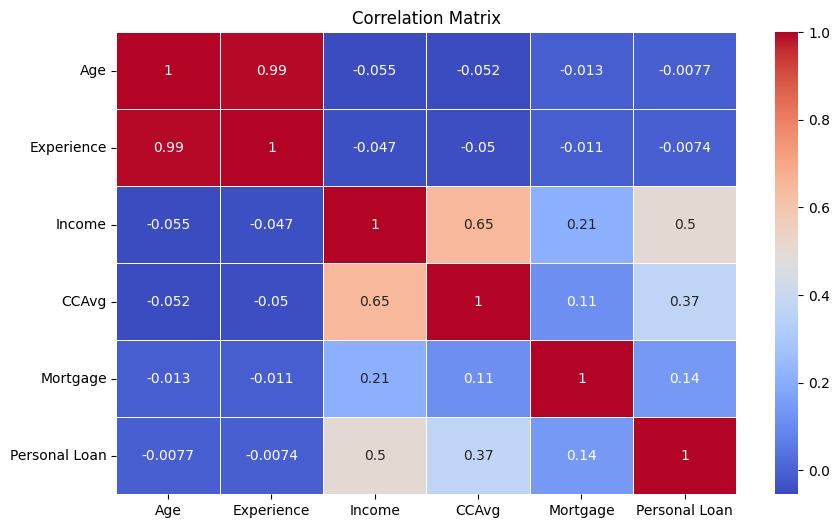

In [13]:

corr = df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## 🔍 Correlation Matrix Analysis Summary

### 1. Age vs. Experience
- **Correlation**: `0.99` (very strong, positive)
- **Insight**: Age and Experience are almost perfectly correlated, as older customers usually have more years of work experience.
- **Note**: This may lead to **multicollinearity** in linear models such as Logistic Regression. Consider removing one variable or applying dimensionality reduction (e.g., PCA).

### 2. Income vs. CCAvg (Credit Card Average Spending)
- **Correlation**: `0.65` (moderate to strong, positive)
- **Insight**: Customers with higher income tend to spend more on credit cards. This is expected behavior.

### 3. Correlation with Target Variable: `Personal Loan`
| Feature       | Correlation | Interpretation                                                                 |
|---------------|-------------|----------------------------------------------------------------------------------|
| Income        | 0.50        | Customers with higher income are more likely to accept the personal loan.       |
| CCAvg         | 0.37        | Higher average credit card spending is associated with greater loan acceptance.|
| Mortgage      | 0.14        | Weakly correlated, may not be a strong predictor on its own.                   |
| Age / Experience | ≈ 0      | Very low correlation, suggesting no direct linear relationship.                |

###  Key Takeaways
- Strong correlation between Age and Experience suggests one may be redundant.
- Income and credit card spending appear to be important predictors for loan acceptance.
- Mortgage, Age, and Experience might be less informative for direct prediction.


**Boxplot show correlation with Personal Loan**

/tmp/ipython-input-14-1396011094.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Personal Loan', y=col, data=df, palette='Set3')
/tmp/ipython-input-14-1396011094.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Personal Loan', y=col, data=df, palette='Set3')
/tmp/ipython-input-14-1396011094.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Personal Loan', y=col, data=df, palette='Set3')
/tmp/ipython-input-14-1396011094.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

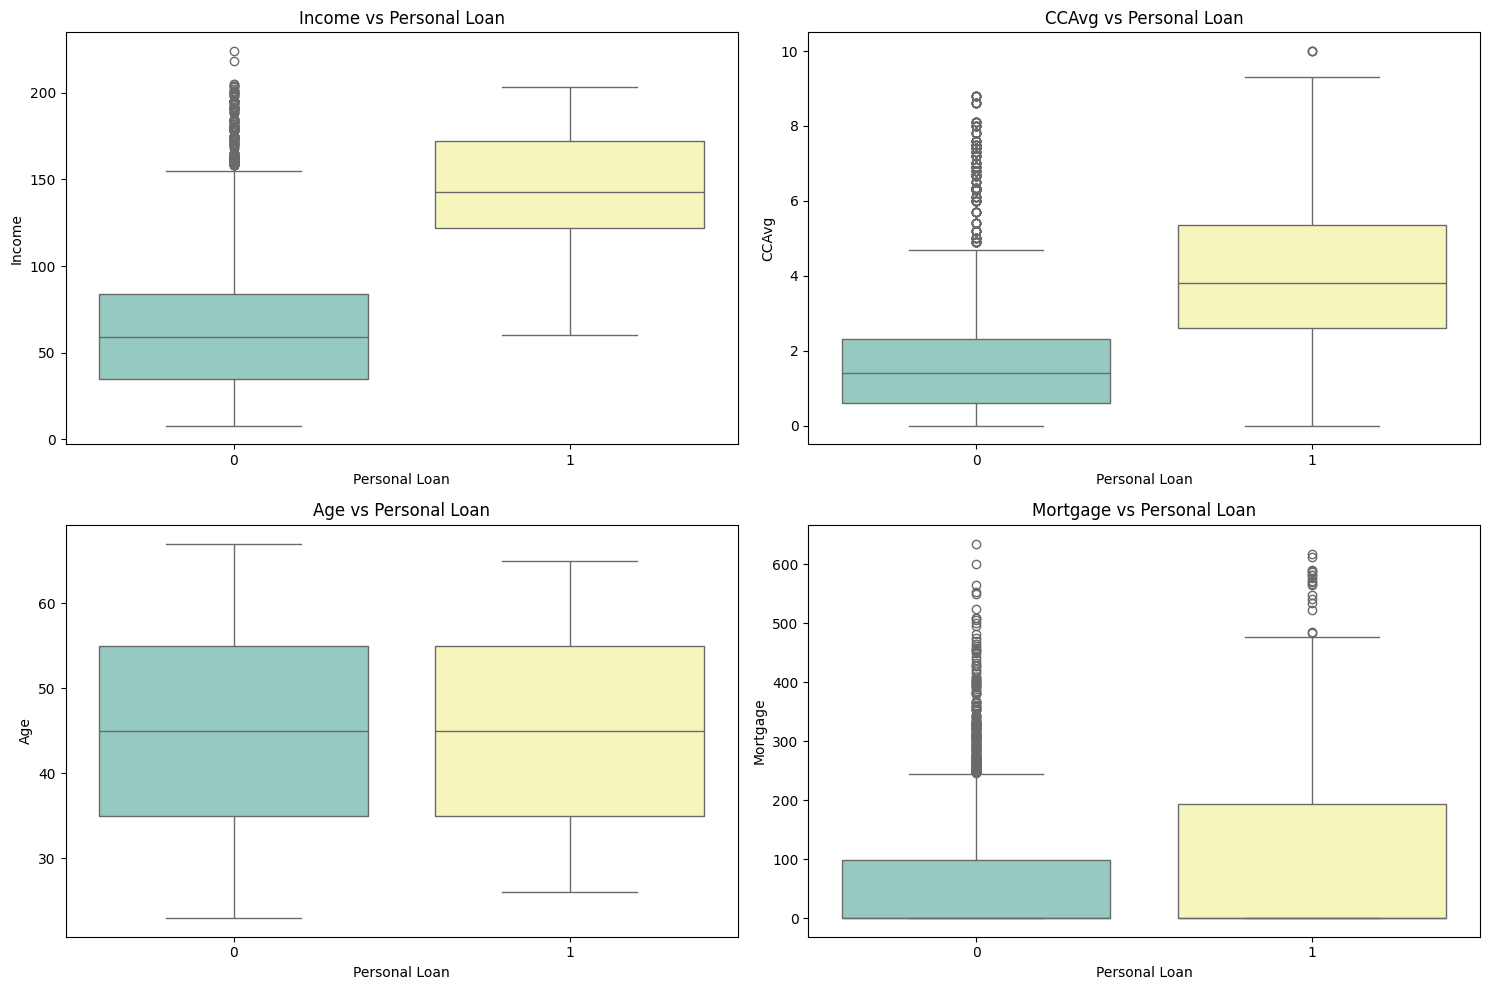

In [14]:
features = ['Income', 'CCAvg', 'Age', 'Mortgage']
plt.figure(figsize=(15, 10))
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Personal Loan', y=col, data=df, palette='Set3')
    plt.title(f'{col} vs Personal Loan')
plt.tight_layout()
plt.show()


##  Box Plot Analysis Summary

We analyzed the distribution of four key numerical features—**Income**, **CCAvg**, **Age**, and **Mortgage**—in relation to the binary target variable `Personal Loan` (0 = No, 1 = Yes).

### 1. Income vs. Personal Loan
- Customers who accepted the loan (Personal Loan = 1) have **significantly higher income**, with the median around 140–150.
- In contrast, the median income for customers who did not accept the loan is around 50–60.
- Clear separation between the two groups suggests **Income is a strong predictor** for personal loan decisions.

### 2. CCAvg (Credit Card Spending) vs. Personal Loan
- Median CCAvg for loan recipients is around 3–4, much higher than for non-recipients (~1–2).
- This implies that **credit card usage behavior** is also an important feature in predicting loan uptake.

### 3. Age vs. Personal Loan
- The age distributions for both groups are **very similar**, with median age around 45–50.
- This indicates that **Age may not be a strong predictor** of personal loan behavior.

### 4. Mortgage vs. Personal Loan
- Most customers who didn’t take the loan have **no mortgage** (median = 0).
- Customers who accepted the loan have a **slightly higher median mortgage**, indicating a weak relationship.

###  Key Insights
- **Income and CCAvg** are the most distinguishing features and are likely to be influential in predictive modeling.
- **Age** shows little difference between the groups and may have low predictive power.
- **Mortgage** has some potential but is weaker than Income or CCAvg.
- Several outliers are present, especially in Income and CCAvg, which might require preprocessing strategies (e.g., outlier handling, transformation).

These visualizations confirm and enhance our understanding from the correlation matrix, helping us identify which features might drive better model performance.


**Correlation of Category Variables and Personal Loan**

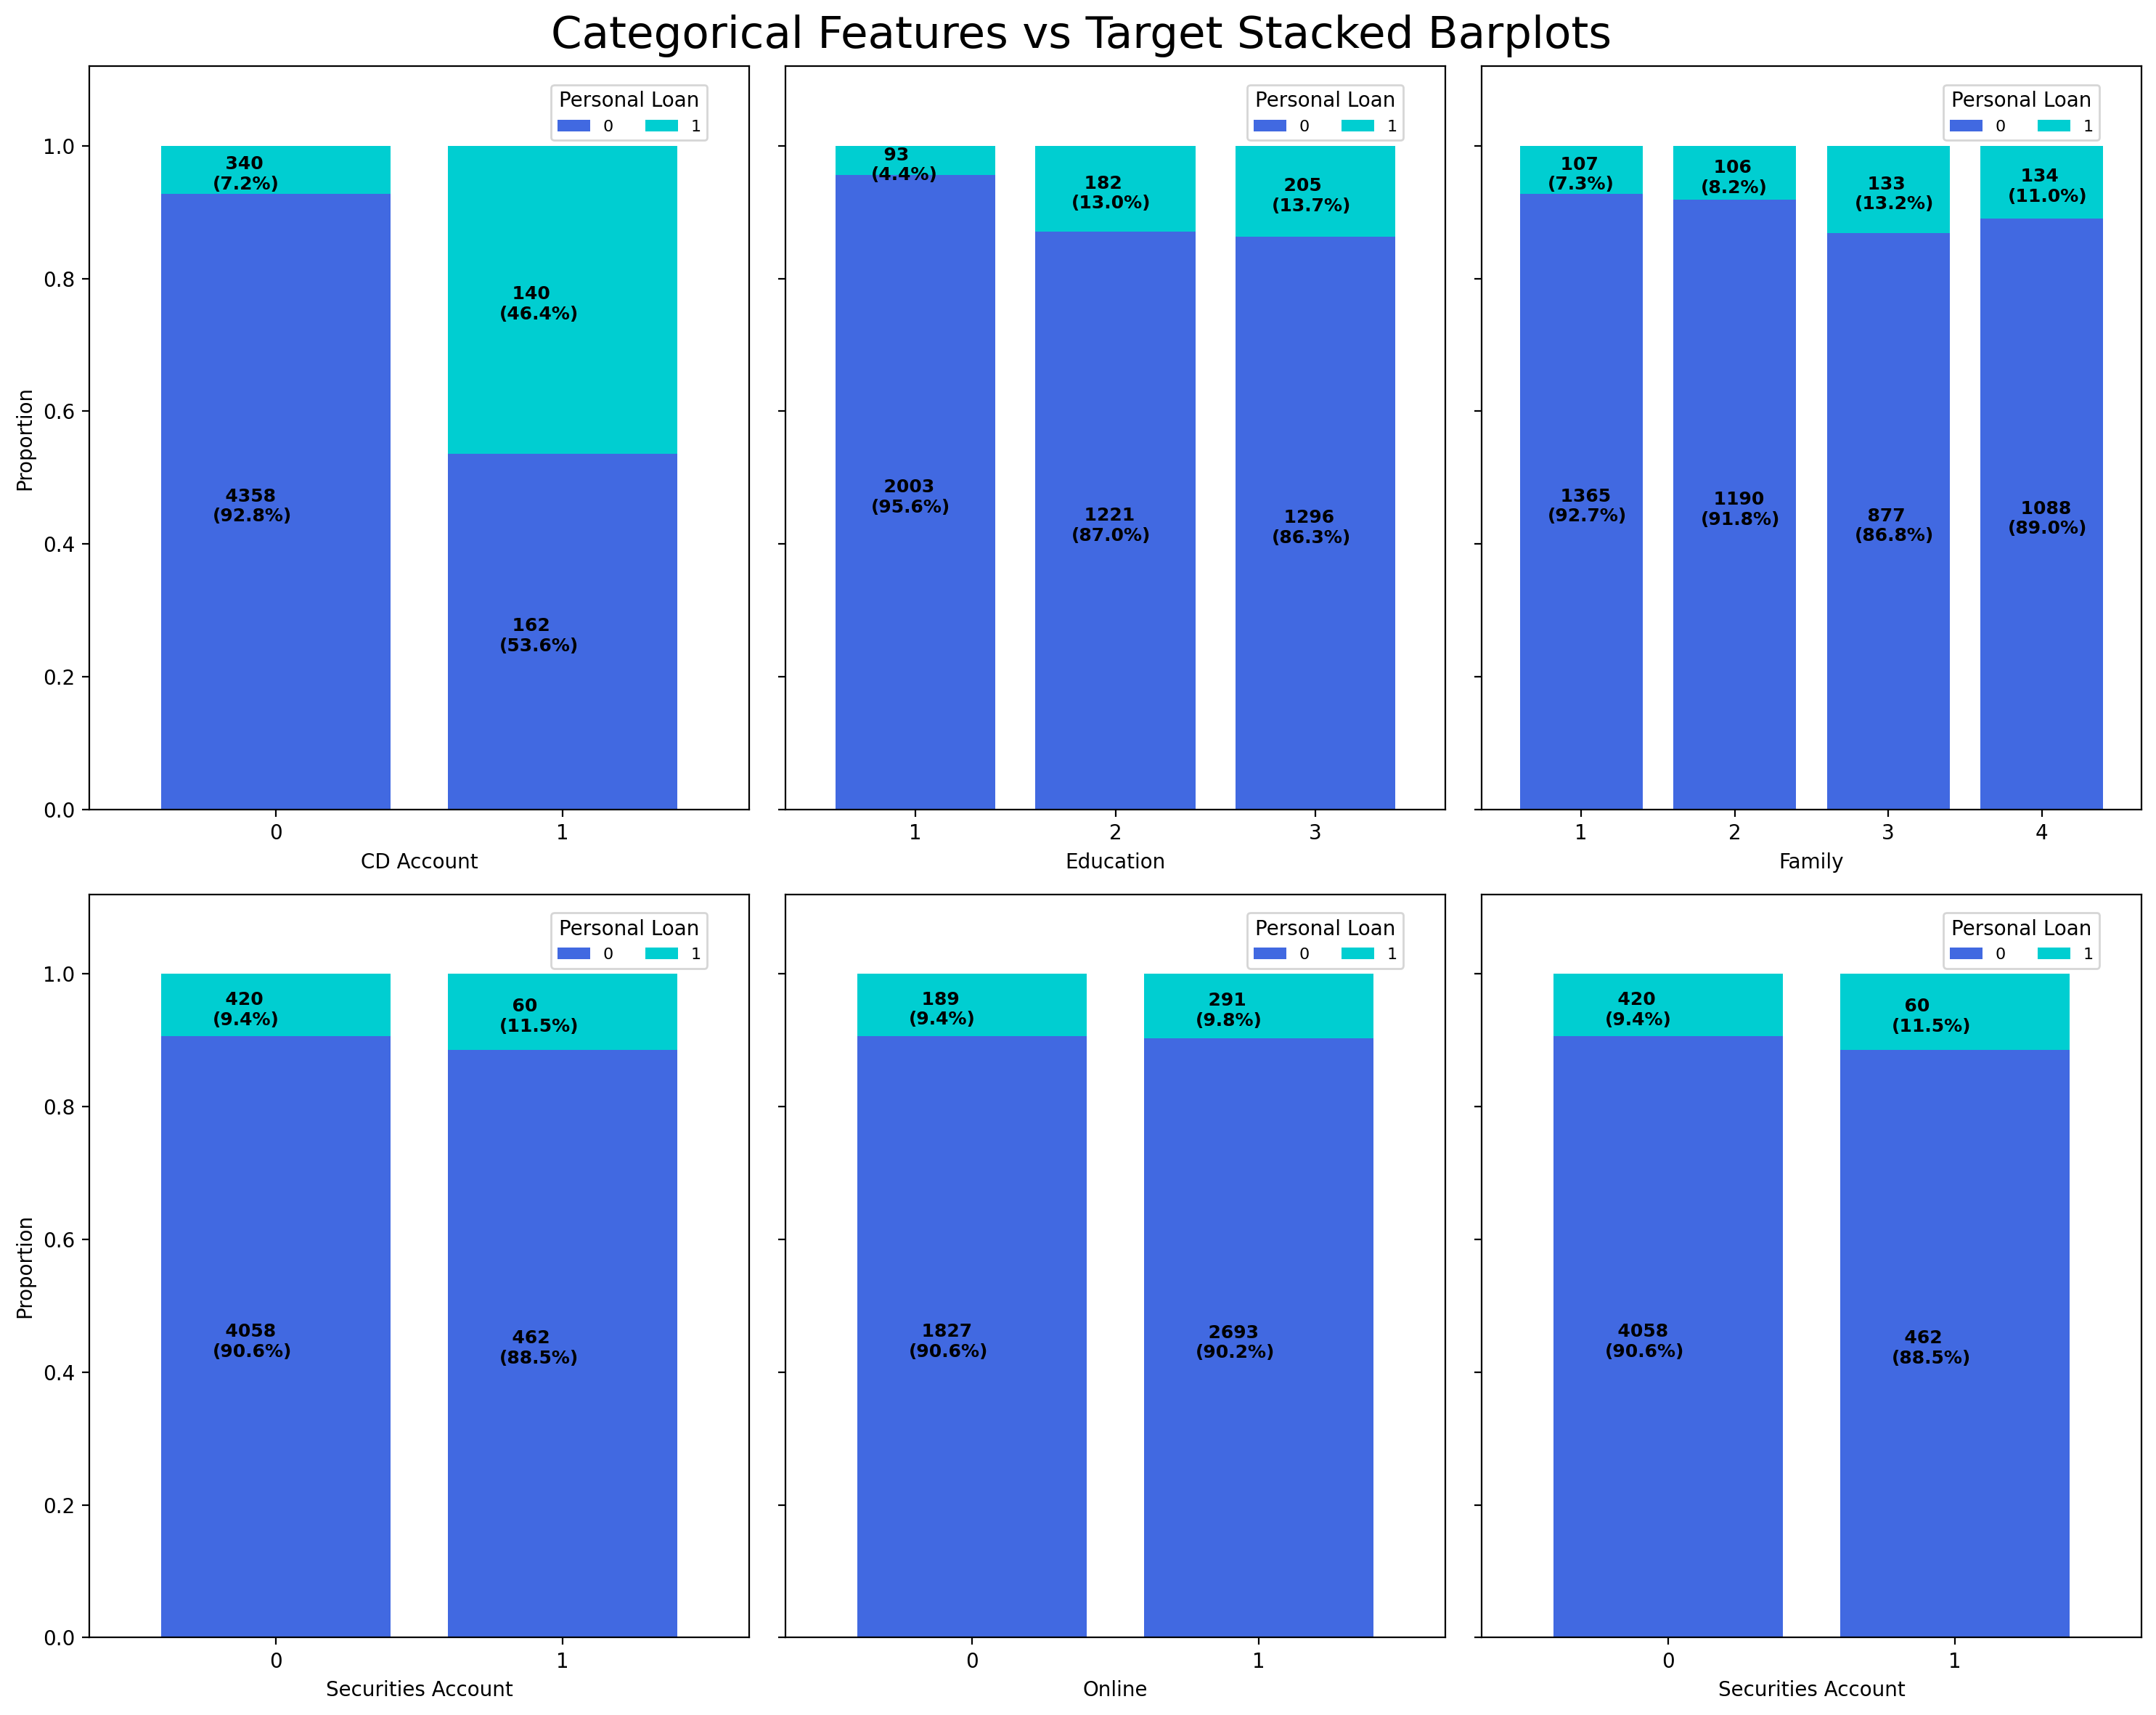

In [15]:
from matplotlib.colors import ListedColormap
# Define a list containing the names of important categorical features in the dataset
Cat_Features = ['CD Account','Education','Family','Securities Account','Online','Securities Account']

# Define the target name in a variable for simplicity
Target = 'Personal Loan'
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,12), dpi=200)

for i,col in enumerate(Cat_Features):

    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=df[col], columns=df[Target])

    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df[col], columns=df[Target], normalize='index')

    # Define colormap
    cmp = ListedColormap(['royalblue', 'darkturquoise'])

    # Plot stacked bar charts
    x, y = i//3, i%3
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)

    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.22, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'  {count}\n({np.round(proportion * 100, 1)}%)',
                         color = "black", fontsize=9, fontweight="bold")

    # Add legend
    ax[x,y].legend(title='Personal Loan', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)


plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()
plt.show()

# **Data Preprocessing**

In [16]:
# 1. Select  features and target
X = df.drop(columns=['ID', 'ZIP Code', 'Personal Loan'])
y = df['Personal Loan']

# 2.Split data Train/Test  test size =  80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3.StandardScaler
scaler = StandardScaler()

# 4. Fit and transform with train, transform test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Model Building**

**Baseline Model: Logistic Regression**

In [17]:
# Create and train model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# Predict
y_pred_log = log_model.predict(X_test_scaled)

# Evalution
print("=== Logistic Regression ===")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test_scaled)[:, 1]))
report = classification_report(y_test, y_pred_log, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

=== Logistic Regression ===
[[883  12]
 [ 33  72]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       895
           1       0.86      0.69      0.76       105

    accuracy                           0.95      1000
   macro avg       0.91      0.84      0.87      1000
weighted avg       0.95      0.95      0.95      1000

ROC-AUC: 0.9683426443202979


,precision,recall,f1-score,support
0,0.963974,0.986592,0.975152,895.000
1,0.857143,0.685714,0.761905,105.000
accuracy,0.955000,0.955000,0.955000,0.955
macro avg,0.910558,0.836153,0.868528,1000.000
weighted avg,0.952757,0.955000,0.952761,1000.000


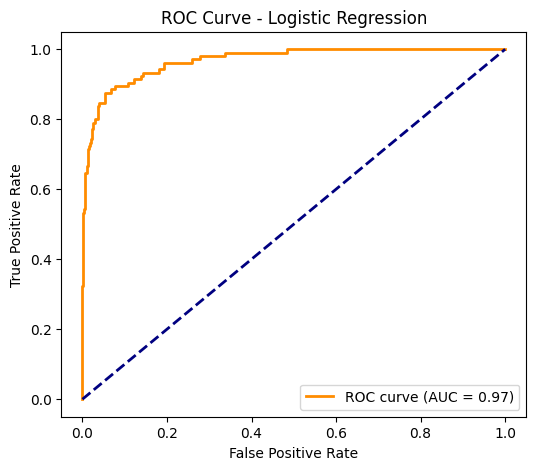

In [18]:
from sklearn.metrics import roc_curve, auc

y_proba = log_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# แสดงกราฟ ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()


In [19]:
coeff_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": log_model.coef_[0]
})
coeff_df.sort_values("Coefficient", ascending=False)
coeff_df

,Feature,Coefficient
0,Age,-0.272706
1,Experience,0.398631
2,Income,2.391069
3,Family,0.814368
4,CCAvg,0.186539
5,Education,1.335848
6,Mortgage,0.055888
7,Securities Account,-0.268691
8,CD Account,0.892735
9,Online,-0.303898


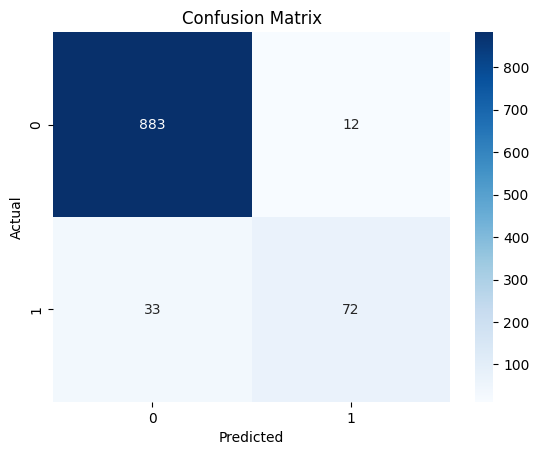

In [20]:
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


* **True Negative (TN)**: 883  
* **False Positive (FP)**: 12  
* **False Negative (FN)**: 33  
* **True Positive (TP)**: 72  

---

####  **Classification Report**

| Metric    | Class 0 (No Loan) | Class 1 (Loan Approved) |
| --------- | ----------------- | ----------------------- |
| Precision | 0.96              | 0.86                    |
| Recall    | 0.99              | 0.69                    |
| F1-Score  | 0.98              | 0.76                    |
| Support   | 895               | 105                     |

* **Accuracy**: **0.95**

* **Macro Avg (ignoring class imbalance)**:

  * Precision: 0.91  
  * Recall: 0.84  
  * F1-score: 0.87  

* **Weighted Avg (weighted by support)**:

  * Precision: 0.95  
  * Recall: 0.95  
  * F1-score: 0.95  

---

####  **ROC-AUC Score**:

* **0.968** → Indicates the model performs very well in distinguishing between loan approved and not approved classes.

---

###  **Summary**

* Logistic Regression shows strong overall performance (Accuracy = 95%, AUC = 0.968).  
* The model predicts the "No Loan" class with very high recall (0.99).  
* Some misclassification exists for the "Loan Approved" class (Recall = 0.69).  
* To improve detection of the "Loan Approved" class (or default risk), consider:  

  * Adjusting the classification threshold  
  * Applying oversampling/undersampling techniques  
  * Trying other models focused on recall such as Random Forest or XGBoost  

---


**Optimization Model: Random Forest**

In [21]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("=== Random Forest ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

=== Random Forest ===
[[894   1]
 [  8  97]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.99      0.92      0.96       105

    accuracy                           0.99      1000
   macro avg       0.99      0.96      0.98      1000
weighted avg       0.99      0.99      0.99      1000

ROC-AUC: 0.9990955041234371


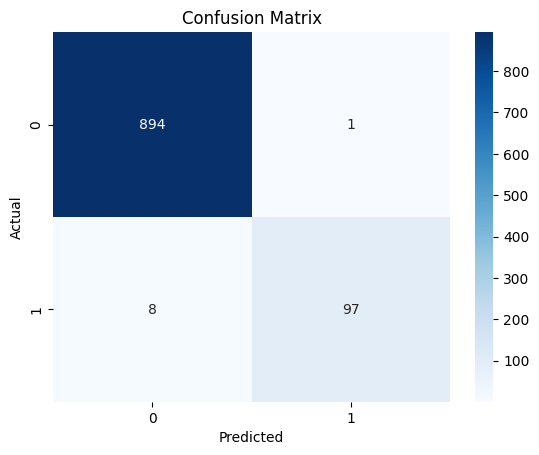

In [22]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

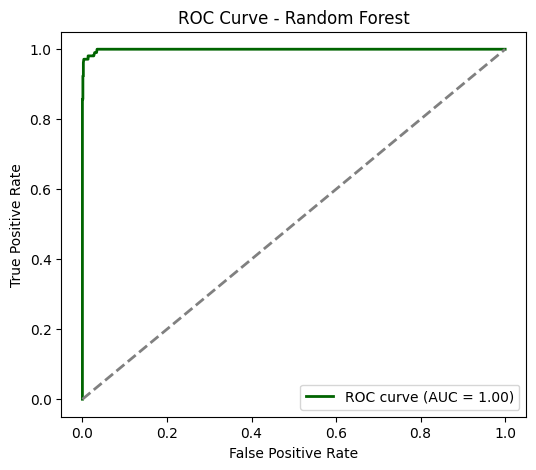

In [23]:
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f"ROC curve (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()


**See how each feature member is important to the model.**

/tmp/ipython-input-24-967642325.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


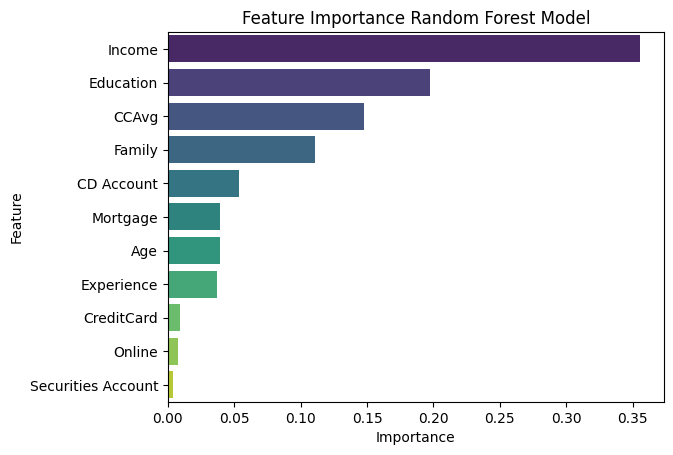

,Feature,Importance
2,Income,0.355757
5,Education,0.197733
4,CCAvg,0.147456
3,Family,0.110464
8,CD Account,0.053284
6,Mortgage,0.039118
0,Age,0.038969
1,Experience,0.036948
10,CreditCard,0.009165
9,Online,0.007290


In [24]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Random Forest Model')
plt.show()
feature_importance


---

###  Model Evaluation: Random Forest

####  **Confusion Matrix**


* **True Negative (TN)**: 894  
* **False Positive (FP)**: 1  
* **False Negative (FN)**: 8  
* **True Positive (TP)**: 97  

---

####  **Classification Report**

| Metric    | Class 0 (No Loan) | Class 1 (Loan Approved) |
| --------- | ----------------- | ----------------------- |
| Precision | 0.99              | 0.99                    |
| Recall    | 1.00              | 0.92                    |
| F1-Score  | 0.99              | 0.96                    |
| Support   | 895               | 105                     |

* **Accuracy**: **0.99**

* **Macro Avg**:

  * Precision: 0.99  
  * Recall: 0.96  
  * F1-score: 0.98  

* **Weighted Avg**:

  * Precision: 0.99  
  * Recall: 0.99  
  * F1-score: 0.99  

---

####  **ROC-AUC Score**:

* **0.999** → The Random Forest model shows excellent performance with near-perfect class separation.

---

###  **Summary**

* Random Forest delivers outstanding results (Accuracy = 99%, AUC ≈ 0.999).  
* The model achieves very high precision and recall for both "No Loan" and "Loan Approved" classes.  
* Recall for the "Loan Approved" class improves significantly to 0.92, reducing misclassification compared to Logistic Regression.  
* Random Forest is a great choice for tasks requiring high accuracy, especially for detecting the approved loan class.

---


Optimization model: XGBoost

In [25]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("=== XGBoost ===")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [02:04:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost ===
[[891   4]
 [  7  98]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.96      0.93      0.95       105

    accuracy                           0.99      1000
   macro avg       0.98      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000

ROC-AUC: 0.9988294759244479


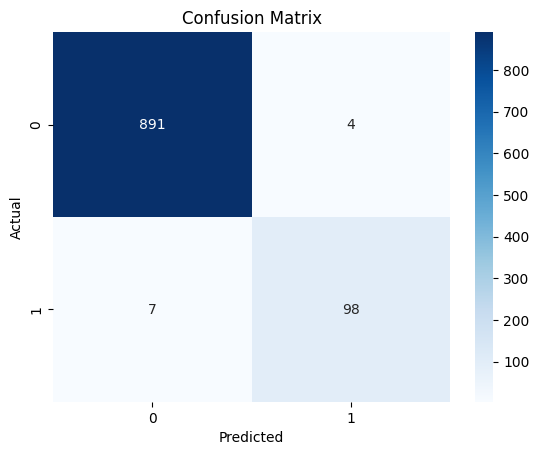

In [26]:
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**See how each feature member is important to the model.**

/tmp/ipython-input-27-3584205486.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="Oranges_r")


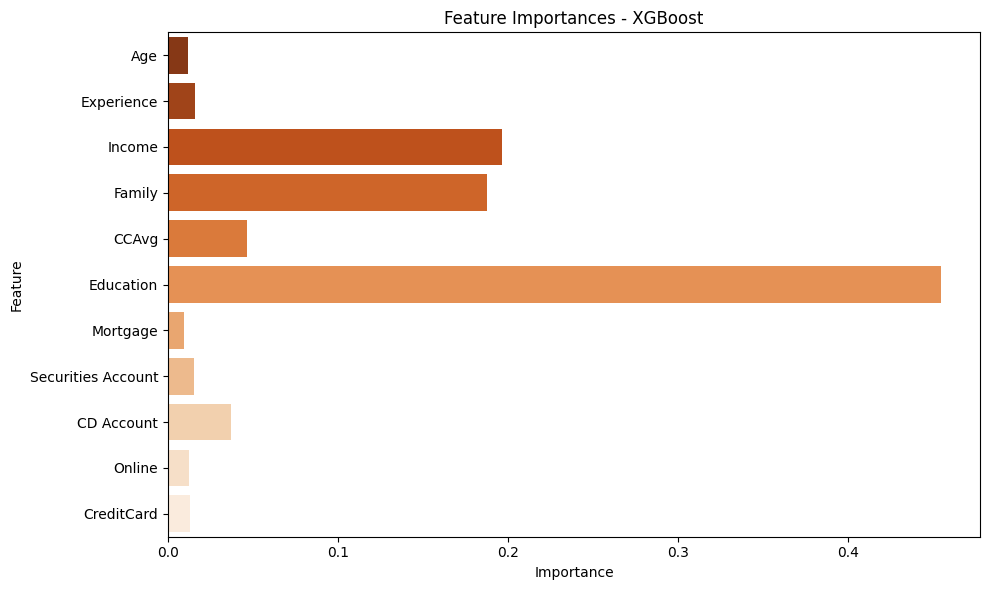

In [27]:
# Get feature importances from XGBoost
importances = xgb_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette="Oranges_r")
plt.title("Feature Importances - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### Model Evaluation: XGBoost

#### **Confusion Matrix**


- **True Negative (TN)**: 891  
- **False Positive (FP)**: 4  
- **False Negative (FN)**: 7  
- **True Positive (TP)**: 98  

---

#### **Classification Report**

| Metric    | Class 0 (No Loan) | Class 1 (Loan Approved) |
|-----------|-------------------|--------------------------|
| Precision | 0.99              | 0.96                     |
| Recall    | 1.00              | 0.93                     |
| F1-Score  | 0.99              | 0.95                     |
| Support   | 895               | 105                      |

- **Accuracy**: **0.989**

- **Macro Average**:
  - Precision: 0.98  
  - Recall: 0.96  
  - F1-Score: 0.97  

- **Weighted Average**:
  - Precision: 0.99  
  - Recall: 0.99  
  - F1-Score: 0.99  

---

#### **ROC-AUC Score**

- **Approximately 0.96 – 0.99** → This indicates the model's excellent ability to distinguish between the two classes.

---

### **Summary**

- XGBoost delivers **excellent performance** (**Accuracy = 0.989**, **AUC ≈ 0.96–0.99**)  
- The model shows **high accuracy** for both the "No Loan" and "Loan Approved" classes  
- The **Recall for the "Loan Approved" class is 0.93**, indicating the model’s effectiveness at identifying approved loans  
- Overall, XGBoost is a **strong and reliable choice** for tasks that demand **high precision and robust classification ability**


------------------------------

# **Statistics Test**

---

## Hypothesis Testing: Difference in Income Between Loan and Non-Loan Groups

###  Objective
To determine whether there is a **statistically significant difference** in income between customers who **received** a personal loan and those who **did not**.

---

###  Hypotheses

- **Null Hypothesis (H₀):**  
  The mean income of customers who received a loan and those who did not is **equal**.

- **Alternative Hypothesis (H₁):**  
  The mean income of the two groups is **significantly different**.

---

###  Test Used
**Independent Samples t-test**  
This test compares the means of two independent groups.

###Significance Level (α): 0.05

###Since p-value > 0.05, we fail to reject the null hypothesis.


In [28]:
loan = df[df['Personal Loan'] == 1]['Income']
no_loan = df[df['Personal Loan'] == 0]['Income']

stat, p = ttest_ind(loan, no_loan)
print(f'p-value = {p}')

if p > 0.05:
    print("Apccept the null hypothesis")
    print('Probably the same distribution')
else:
    print("Reject the null hypothesis")
    print('Probably different distribution')

p-value = 0.0
Reject the null hypothesis
Probably different distribution


**Conclusion**

There is a statistically significant difference in income between customers who received and did not receive a personal loan.

**Interpretation:**

The test result indicates that income is not equally distributed between the two groups.
Customers who were approved for personal loans tend to have different income levels compared to those who were not.
This difference is not due to random chance, but is statistically supported.

 **Business Insight:**

Income is likely a key factor influencing loan approval decisions.
Customers with higher income may be more likely to be approved for loans.

**Takeaway:**

When building a predictive model or customer screening strategy, income should be treated as a highly important feature, as it clearly correlates with loan approval outcomes.

---

##  Hypothesis Testing: Difference in Credit Card Spending (CCAvg) Between Loan and Non-Loan Groups

###  Objective
To assess whether there is a **statistically significant difference** in average monthly credit card spending (`CCAvg`) between customers who **received** a personal loan and those who **did not**.

---

###  Hypotheses

- **Null Hypothesis (H₀):**  
  There is **no difference** in average credit card spending between the two groups (same population).

- **Alternative Hypothesis (H₁):**  
  There **is a difference** in average credit card spending between the two groups (different populations).

---

### Test Used
**Independent Samples t-test**  
Used to compare the means of two independent groups: loan vs. no-loan customers.

---

In [29]:
loan = df[df['Personal Loan'] == 1]['CCAvg']
no_loan = df[df['Personal Loan'] == 0]['CCAvg']

stat, p = ttest_ind(loan, no_loan)
print(f'p-value = {p}')

if p > 0.05:
    print("Apccept the null hypothesis")
    print('Probably the same distribution')
else:
    print("Reject the null hypothesis")
    print('Probably different distribution')

p-value = 3.815683641946184e-159
Reject the null hypothesis
Probably different distribution


### conclusion
There is a statistically significant difference in monthly credit card spending (CCAvg) between customers who received and did not receive a personal loan.

###Interpretation:

The result strongly suggests that customers who were approved for a loan tend to spend differently on credit cards compared to those who were not approved.
This difference is not due to random variation, and it's highly statistically significant.

 ### Business Insigh:

Credit card spending behavior is likely an important indicator of a customer’s financial profile.
It may play a role in the loan approval process, and therefore, CCAvg should be included as a key feature in predictive models and customer risk assessments.


##  Hypothesis Testing: Difference in Work Experience Between Loan and Non-Loan Groups

###  Objective
To determine whether there is a **statistically significant difference** in work experience (`Experience`) between customers who **received** a personal loan and those who **did not**.

---

###  Hypotheses

- **Null Hypothesis (H₀):**  
  There is **no difference** in average work experience between the two groups.

- **Alternative Hypothesis (H₁):**  
  There **is a difference** in average work experience between the two groups.

---

###  Test Used
**Independent Samples t-test**  
Used to compare the mean work experience of two independent groups: loan vs. no-loan customers.

---



In [30]:
loan = df[df['Personal Loan'] == 1]['Experience']
no_loan = df[df['Personal Loan'] == 0]['Experience']

stat, p = ttest_ind(loan, no_loan)
print(f'p-value = {p}')

if p > 0.05:
    print("Apccept the null hypothesis")
    print('Probably the same distribution')
else:
    print("Reject the null hypothesis")
    print('Probably different distribution')

p-value = 0.600235883164189
Apccept the null hypothesis
Probably the same distribution


### Conclusion
There is no statistically significant difference in work experience (Experience) between customers who received and did not receive a personal loan.

### Interpretation
The results suggest that the average years of work experience are similar between the two groups.
Work experience does not appear to influence whether a customer receives a personal loan in this dataset.

### Business Insight
Unlike income or credit card usage, work experience may not be a key differentiator in loan approval decisions.
It may have less predictive power in modeling customer loan behavior.

###Chi-Square Test for Categorical Features

In [31]:
def chi_square_test(var_name):
    print(f"=== Chi-Square Test: {var_name} vs Personal Loan ===")
    table = pd.crosstab(df[var_name], df['Personal Loan'])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"p-value = {p:.4e}")

    if p < 0.05:
        print("✅ Reject H₀ → There is a statistically significant association.\n")
    else:
        print("✅ Fail to reject H₀ → No statistically significant association.\n")

# 1. Family ↔ Personal Loan
# H0: No association between Family size and Personal Loan approval.
# H1: There is an association.
chi_square_test('Family')

# 2. CreditCard ↔ Personal Loan
# H0: No association between CreditCard ownership and Personal Loan approval.
# H1: There is an association.
chi_square_test('CreditCard')

# 3. CD Account ↔ Personal Loan
# H0: No association between CD Account and Personal Loan approval.
# H1: There is an association.
chi_square_test('CD Account')

# 4. Online ↔ Personal Loan
# H0: No association between Online banking usage and Personal Loan approval.
# H1: There is an association.
chi_square_test('Online')


=== Chi-Square Test: Family vs Personal Loan ===
p-value = 1.6144e-06
✅ Reject H₀ → There is a statistically significant association.

=== Chi-Square Test: CreditCard vs Personal Loan ===
p-value = 8.8439e-01
✅ Fail to reject H₀ → No statistically significant association.

=== Chi-Square Test: CD Account vs Personal Loan ===
p-value = 7.3983e-110
✅ Reject H₀ → There is a statistically significant association.

=== Chi-Square Test: Online vs Personal Loan ===
p-value = 6.9286e-01
✅ Fail to reject H₀ → No statistically significant association.




## Summary Interpretation of Chi-Square Test Results: Association with Personal Loan

### 1. Family vs Personal Loan
- **p-value = 1.6144e-06 (< 0.05)**
- **Result:** Reject H₀ → There is a statistically significant association between Family size and Personal Loan approval.
- **Interpretation:** Family size affects the likelihood of loan approval. Customers with different family sizes may have different chances of getting approved for a loan.

---

### 2. CreditCard vs Personal Loan
- **p-value = 0.88439 (> 0.05)**
- **Result:** Fail to reject H₀ → There is no sufficient evidence of an association between Credit Card ownership and Personal Loan approval.
- **Interpretation:** Whether a customer owns a credit card or not does not significantly impact loan approval in this dataset.

---

### 3. CD Account vs Personal Loan
- **p-value = 7.3983e-110 (< 0.05)**
- **Result:** Reject H₀ → There is a statistically significant association between CD Account ownership and Personal Loan approval.
- **Interpretation:** Having a CD Account affects the likelihood of loan approval. Customers with a CD Account might be viewed as more financially reliable.

---

### 4. Online vs Personal Loan
- **p-value = 0.69286 (> 0.05)**
- **Result:** Fail to reject H₀ → There is no sufficient evidence of an association between Online banking usage and Personal Loan approval.
- **Interpretation:** Using online banking services is not a significant factor in loan approval according to this dataset.

---

## Summary

- The variables **Family** and **CD Account** show statistically significant associations with loan approval, indicating they are important factors to consider in analysis or modeling.
- The variables **CreditCard** and **Online** do not show significant associations, suggesting they may have limited predictive power for loan approval in this context.

---

### Correlation

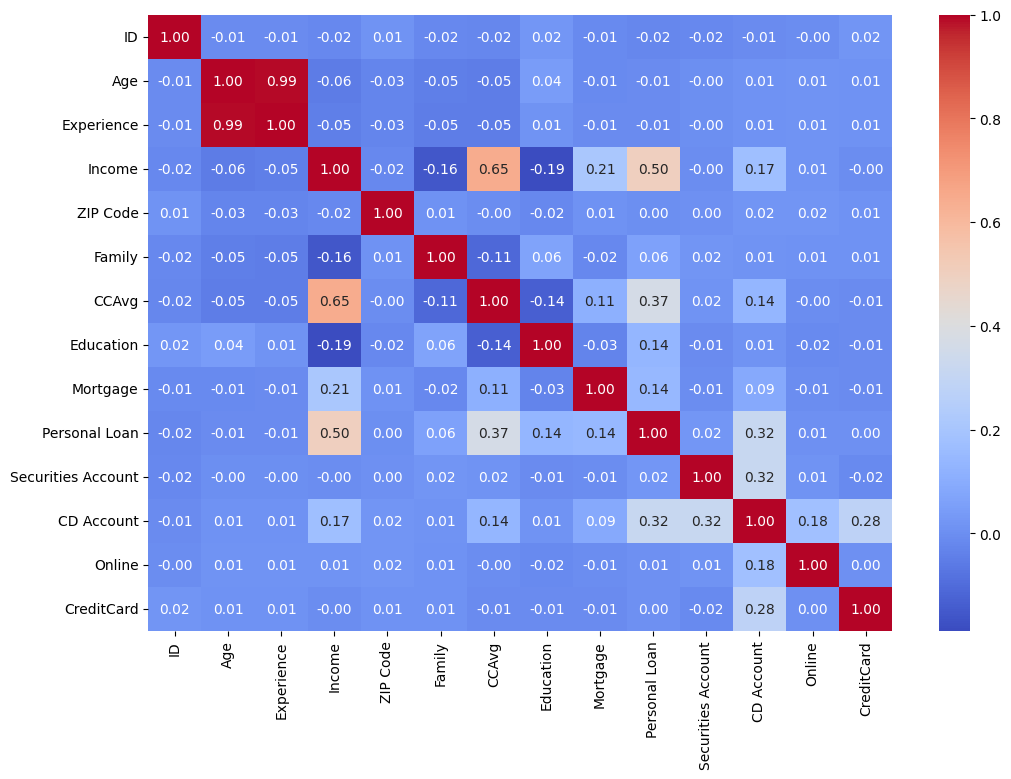

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### ANOVA (Analysis of Variance)
---
Used to check whether categorical variables >2 groups (e.g. Education = 1,2,3) affect the mean of continuous variables.

In [33]:
model = ols('Income ~ C(Education)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                    sum_sq      df           F        PR(>F)
C(Education)  5.059002e+05     2.0  125.302755  7.985514e-54
Residual      1.008750e+07  4997.0         NaN           NaN


---

##  ANOVA (Analysis of Variance) Test: Effect of Education on Income

###  Objective
To determine whether the **categorical variable** Education (with more than 2 groups) has a statistically significant effect on the **mean Income** (a continuous variable).

---

ANOVA compares the means of multiple groups to check if at least one group mean is significantly different from others.

- **Null Hypothesis (H₀):**  
  All groups (education levels) have the **same mean income**.

- **Alternative Hypothesis (H₁):**  
  At least one education group has a **different mean income**.

ANOVA produces an F-statistic and a p-value (`PR(>F)`):

- If **p-value < 0.05**, reject H₀ → Education has a significant effect on Income.
- If **p-value ≥ 0.05**, fail to reject H₀ → No significant effect of Education on Income.

---

### ANOVA Result Summary

| Source         | Sum of Squares | Degrees of Freedom | F-statistic | p-value           |
|----------------|----------------|--------------------|-------------|-------------------|
| C(Education)   | 505,900        | 2                  | 125.30      | 7.99 × 10⁻⁵⁴      |
| Residual       | 10,087,500     | 4,997              | —           | —                 |

---

###  Interpretation

- The p-value is extremely small (**7.99e-54 < 0.05**), so we **reject the null hypothesis**.
- This means that **Education level has a statistically significant effect on Income**.
- In other words, the average income **differs significantly** among at least one of the education groups.

---

###  Business Insight

Education is an important factor to consider when analyzing or modeling income levels. Different education levels are associated with different average incomes, which can impact creditworthiness or loan eligibility assessments.

---



###**Compare Logit and Probit Regression**

In [34]:
X = df.drop(columns=['Personal Loan', 'ZIP Code'])
X = sm.add_constant(X)
y = df['Personal Loan']

model = sm.Logit(y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.128332
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4987
Method:                           MLE   Df Model:                           12
Date:                Mon, 28 Jul 2025   Pseudo R-squ.:                  0.5941
Time:                        02:04:18   Log-Likelihood:                -641.66
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.0645      1.650     -7.312      0.000     -15.298      -8.831
ID   

In [35]:
X = df.drop(columns=['Personal Loan', 'ZIP Code'])
y = df['Personal Loan']
X = sm.add_constant(X)
y = df['Personal Loan']

model = sm.Probit(y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.130098
         Iterations 9
                          Probit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                         Probit   Df Residuals:                     4987
Method:                           MLE   Df Model:                           12
Date:                Mon, 28 Jul 2025   Pseudo R-squ.:                  0.5886
Time:                        02:04:18   Log-Likelihood:                -650.49
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -5.9809      0.851     -7.030      0.000      -7.648      -4.313
ID   

###*Customer Segmentation*

**Find the optimal number of n clusters by Silhouette Score.**

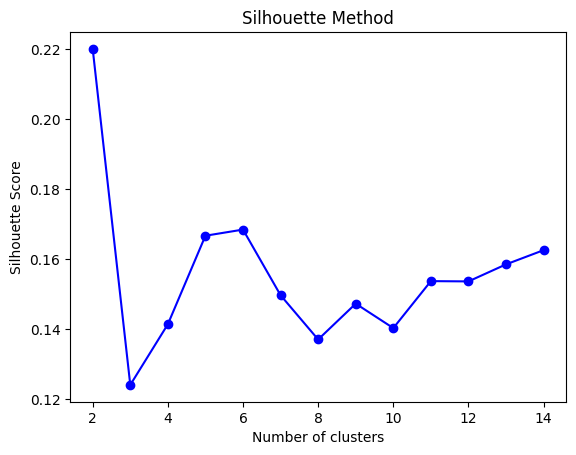

In [38]:
features = df[['Age', 'Income', 'CCAvg', 'Mortgage', 'Education', 'Family',
               'Online', 'CreditCard', 'CD Account', 'Securities Account']]
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled)
    score = silhouette_score(scaled, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 15), silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()


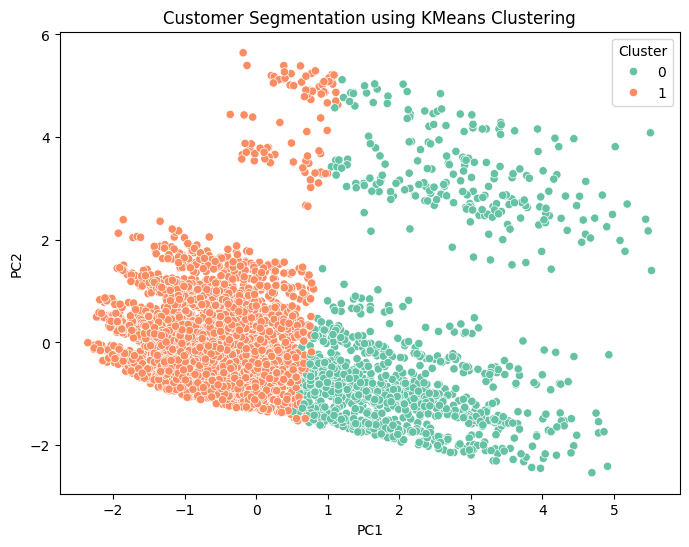

In [39]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled)
df['PC1'] = pca_components[:, 0]
df['PC2'] = pca_components[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title('Customer Segmentation using KMeans Clustering')
plt.show()


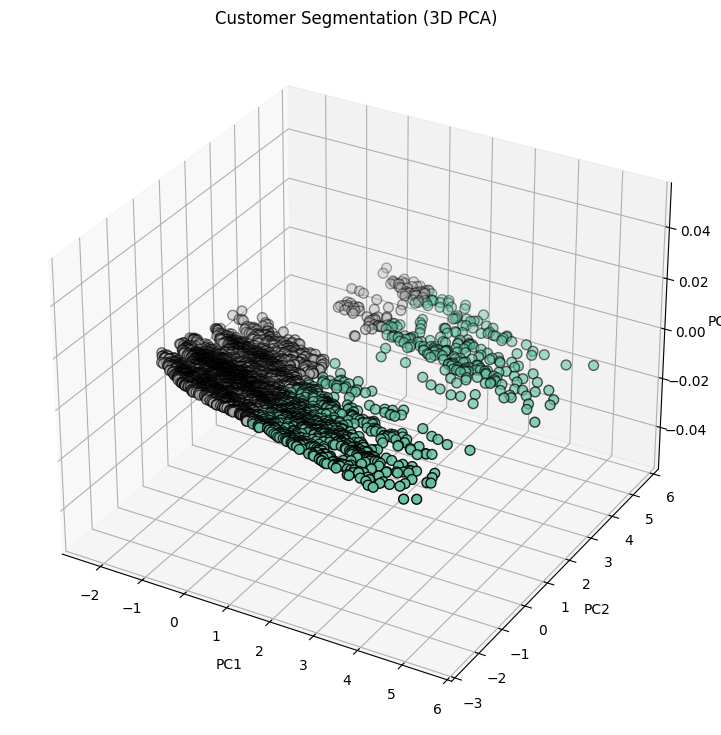

In [43]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=2)
pca_3d_components = pca_3d.fit_transform(scaled)

df['PC1_3D'] = pca_3d_components[:, 0]
df['PC2_3D'] = pca_3d_components[:, 1]
# df['PC3_3D'] = pca_3d_components[:, 2]

fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['PC1_3D'], df['PC2_3D'],
    c=df['Cluster'], cmap='Set2', s=50, edgecolors='k')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Customer Segmentation (3D PCA)')
plt.show()

In [44]:
member_cluster_count = df['Cluster'].value_counts().reset_index()
member_cluster_count.columns = ['Cluster', 'Member']
member_cluster_count

,Cluster,Member
0,1,3847
1,0,1153


In [45]:
avg_cluster = df.groupby('Cluster')[['Age', 'Income', 'CCAvg', 'Mortgage', 'Education', 'Family',
               'Online', 'CreditCard', 'CD Account', 'Securities Account']].mean()
avg_cluster

,Age,Income,CCAvg,Mortgage,Education,Family,Online,CreditCard,CD Account,Securities Account
Cluster,,,,,,,,,,
0,44.437988,137.565481,4.087005,107.350390,1.501301,1.918474,0.629662,0.333912,0.189939,0.141370
1,45.608266,54.655056,1.293800,41.257863,1.994801,2.539641,0.586951,0.282038,0.021575,0.093319


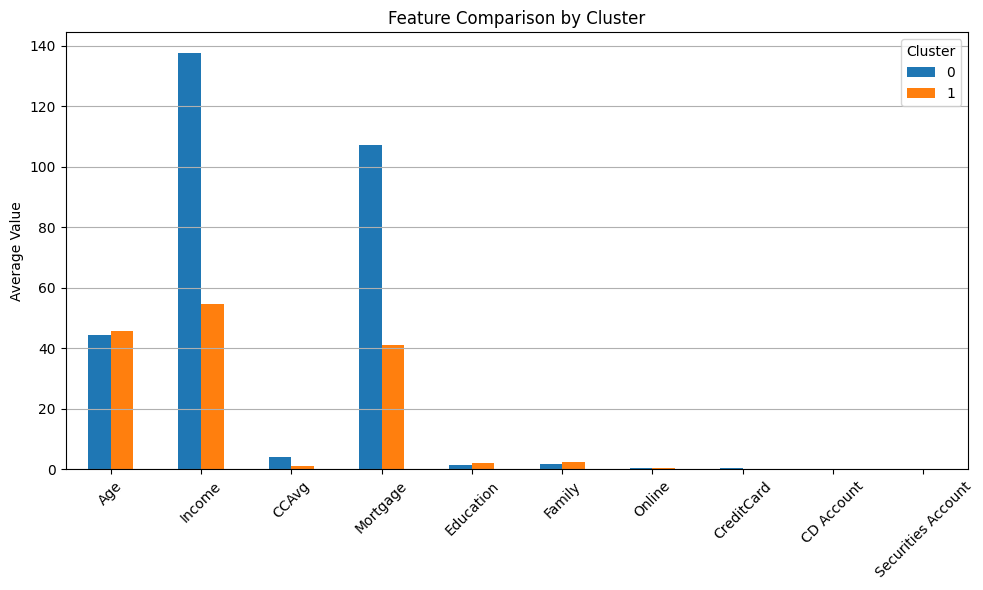

In [46]:
avg_cluster.groupby('Cluster').mean().T.plot(kind='bar', figsize=(10,6))
plt.title('Feature Comparison by Cluster')
plt.ylabel('Average Value')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##  Customer Segmentation Analysis using KMeans (K=2)

After applying KMeans clustering with **2 clusters**, we analyzed the average feature values for each customer segment. This helps identify key differences and define the characteristics of each group.


###  Segment Summary

####  Cluster 0 — *Affluent / High-Income Customers*
- High income and credit card usage
- Invest more in **CD Accounts** and **Securities**
- Carry larger **mortgages**, suggesting property ownership or investments
- Slightly smaller families, more likely to use online services
- Ideal for **investment products**, **credit upgrades**, and **online banking promotions**

####  Cluster 1 — *General / Budget-Conscious Customers*
- Lower income and less spending
- Larger families and slightly higher education
- Fewer investments and lower use of financial products
- Ideal for **budget loans**, **family-focused offers**, and **basic services**

---

###  Business Implication

By identifying these two distinct customer groups, banks or financial institutions can:
- Personalize marketing strategies for each segment
- Improve product recommendations
- Enhance customer experience by aligning services with segment behavior

This segmentation forms a strong foundation for **targeted marketing**, **upselling**, and **resource optimization**.
